In [49]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [50]:
# Load the Excel file
file_path = '../data/patient_no_show_dataset_result.csv'
df = pd.read_csv(file_path)

In [51]:
# Display the first few rows of the dataframe
df.head()

,Patient ID,Age,gender,Ethnicity,Socioeconomic Status,Distance to Facility,Previous No-shows,Appointment No-show,prediction
0,1,56,Female,Ethnicity C,Low,3.13,1,No,Yes
1,2,69,Male,Ethnicity C,Low,10.81,2,Yes,No
2,3,46,Non-Binary,Ethnicity D,Medium,15.94,0,Yes,No
3,4,32,Female,Ethnicity A,Low,18.91,0,No,Yes
4,5,60,Male,Ethnicity A,Low,15.19,3,No,No


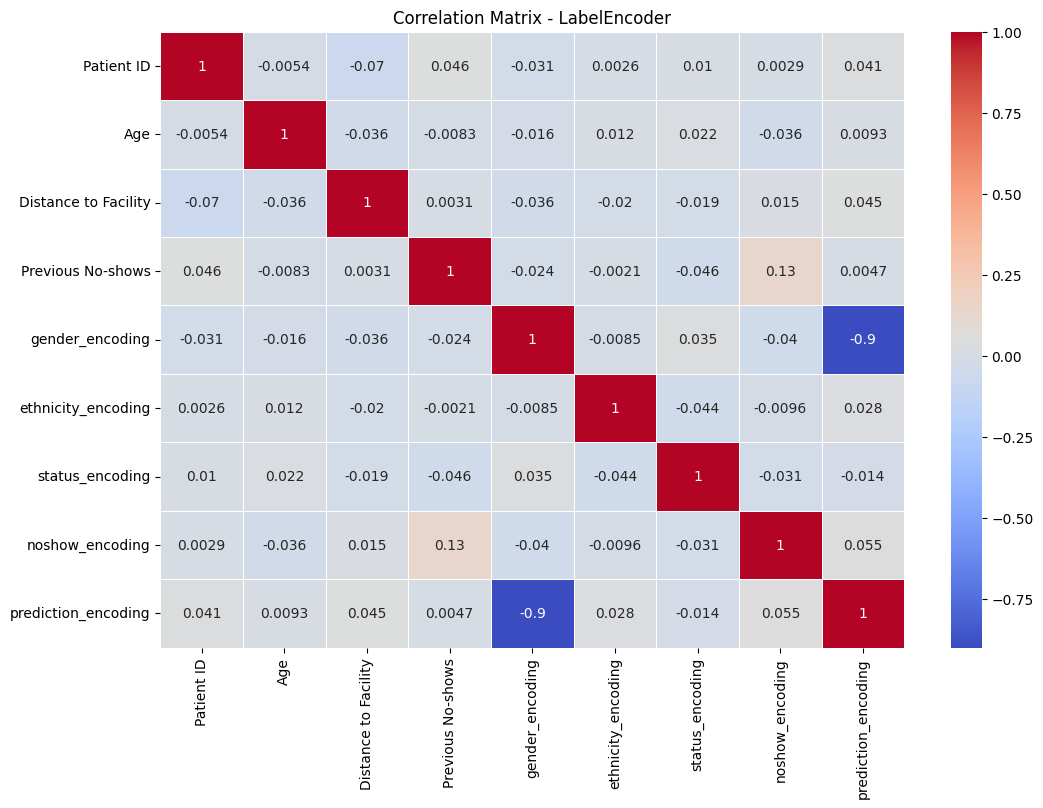

In [52]:
# Label Encoding
label_encoder = LabelEncoder()
df_le = df
df_le['gender_encoding'] = label_encoder.fit_transform(df_le['gender'])
df_le['ethnicity_encoding'] = label_encoder.fit_transform(df_le['Ethnicity'])
df_le['status_encoding'] = label_encoder.fit_transform(df_le['Socioeconomic Status'])
df_le['noshow_encoding'] = label_encoder.fit_transform(df_le['Appointment No-show'])
df_le['prediction_encoding'] = label_encoder.fit_transform(df_le['prediction'])

df_le = df_le.drop(columns=["gender", "Ethnicity", "Socioeconomic Status", "Appointment No-show", "prediction"])

# Generate the correlation matrix
correlation_matrix = df_le.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix - LabelEncoder')
plt.show()

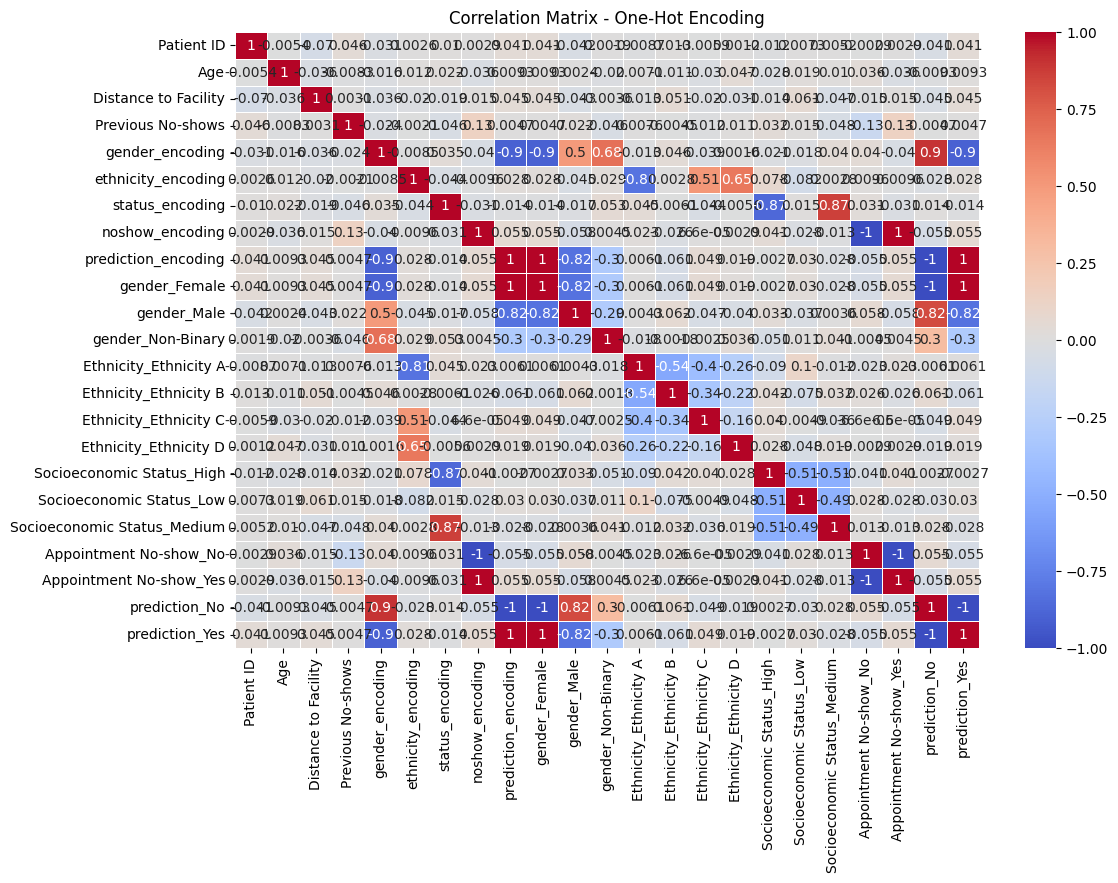

In [53]:
# One-Hot Encoding
one_hot_encoded_df = pd.get_dummies(df, columns=['gender'])
one_hot_encoded_df = pd.get_dummies(one_hot_encoded_df, columns=['Ethnicity'])
one_hot_encoded_df = pd.get_dummies(one_hot_encoded_df, columns=['Socioeconomic Status'])
one_hot_encoded_df = pd.get_dummies(one_hot_encoded_df, columns=['Appointment No-show'])
one_hot_encoded_df = pd.get_dummies(one_hot_encoded_df, columns=['prediction'])

# Generate the correlation matrix
correlation_matrix = one_hot_encoded_df.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix - One-Hot Encoding')
plt.show()